In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Portfolio 3: Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

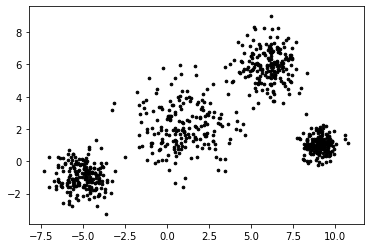

In [2]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

In [3]:
k = 4
c = 2
mean = data.mean()
std = data.std()
np.random.seed(6)
centres = np.random.randn(k, c) * std + mean

In [4]:
centres_df = pd.DataFrame(centres)
centres_df

,0,1
0,1.043017,5.538637
1,3.330612,-1.493825
2,-8.351752,6.334483
3,7.258032,-4.150287


In [5]:
data_df = pd.DataFrame(data)
data_df.head()

,0,1
0,1.661841,1.503695
1,4.646157,1.621862
2,1.164415,4.373722
3,-0.363849,1.112545
4,1.281405,1.505195


Define the following functions to be used in the K-means algorithm:
* __Euclidean distance calculation__ - Use Pythagorean Theorem to compute the distance between two points
* __Cluster tagging__ - Use the Euclidean distance function and calculate to which centroid the point is closest to
* __Recomputation of the new clusters__ - Recompute the new cluster centroids by getting the average of the x- and y-coordinates of each cluster

In [6]:
def euclidean_distance(a, b):
    return np.sqrt(((a - b)**2).sum())

def find_cluster(a, centroid):
    n = len(centroid)
    closest = 0
    min_dist = euclidean_distance(a, centroid.iloc[0])
    for i in range(1, n):
        dist = euclidean_distance(a, centroid.iloc[i])
        if dist < min_dist:
            min_dist = dist
            closest = i
    return closest

def recompute_centroid(df):
    return pd.DataFrame(data_df.groupby('cluster').mean())

## 2. Visualise the clustering results in each iteration

You need to implement the process of k-means clustering.  Implement each iteration as a seperate cell, assigning each data point to the closest centre, then updating the cluster centres based on the data, then plot the new clusters.

The K-means clustering algorithm is executed as follows:  
__Step 1__. Initialise the 4 random clusters generated (assign 4 colours for the clusters.  
__Step 2__. Compute the distance of each data point to each of the 4 clusters and assign the nearest cluster centre appropriate colour to that data point.  
__Step 3__. Recalculate the new cluster centres by getting the average of the x- and y-coordinates of the data points that belong to each of the current cluster centres.  
__Step 4__. Compute the Euclidean distance between the the old cluster centres and the new cluster centres. If the distance between each points of the two sets of clusters is very small (i.e., cluster centres barely moved) or no movement at all, then stop the algorithm, otherwise, repeat from Step 2.

In [7]:
colors = {0 : 'green',
          1 : 'blue',
          2 : 'yellow',
          3 : 'cyan'}
new_cluster_cntr = centres_df

In [8]:
def recompute_and_plot(centroid, recompute = False):
    data_df['cluster'] = data_df[[0, 1]].apply(lambda x: find_cluster(x, centroid), axis = 1)
    if recompute:
        centroid = recompute_centroid(data_df)
    plt.figure(figsize=(10, 7))
    dataset = sns.scatterplot(x = data_df[0], y = data_df[1], hue = data_df.cluster, palette = colors, legend = False)
    centroid = sns.scatterplot(x = centroid[0], y = centroid[1], hue = centroid.index, palette = colors, s = 75, edgecolor = 'r')
    return dataset, centroid

Text(0, 1.05, 'Initial State')

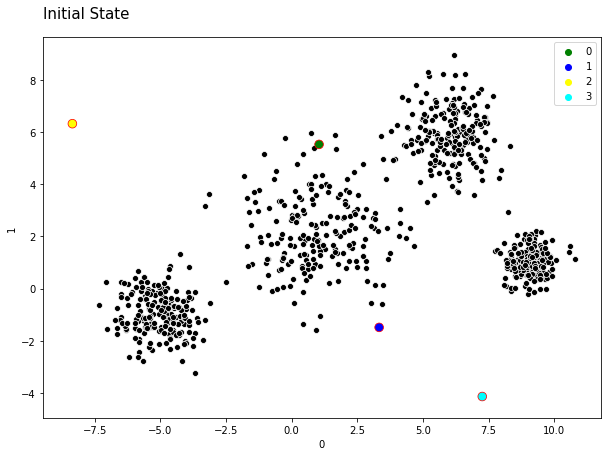

In [9]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x = data_df[0], y = data_df[1], color = 'k', legend = False)
sns.scatterplot(x = new_cluster_cntr[0], y = new_cluster_cntr[1], hue = new_cluster_cntr.index, palette = colors, s = 75, edgecolor = 'r')
plt.annotate('Initial State', xy = (0, 1.05), xycoords = 'axes fraction', fontsize = 15)

Text(0, 1.05, 'Iteration 0 (Compute Nearest Cluster)')

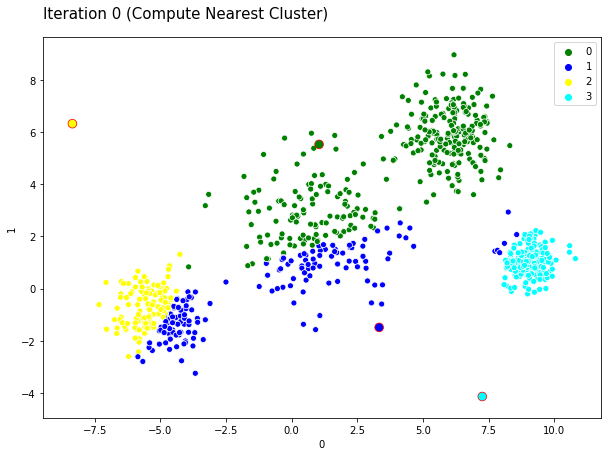

In [10]:
recompute_and_plot(new_cluster_cntr, recompute = False)
plt.annotate('Iteration 0 (Compute Nearest Cluster)', xy = (0, 1.05), xycoords = 'axes fraction', fontsize = 15)

0    3.671697
1    5.758375
2    9.835599
3    3.336064
dtype: float64

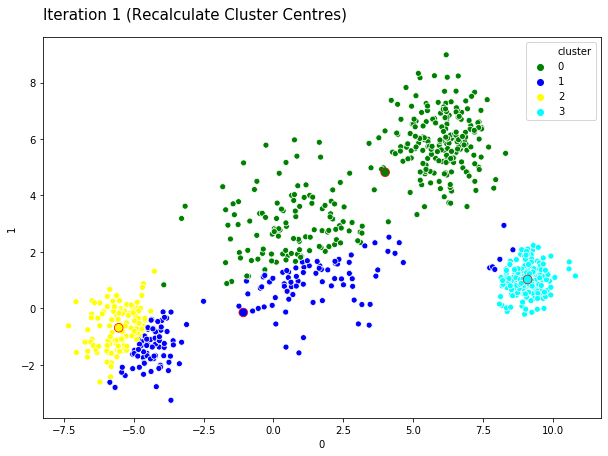

In [11]:
recompute_and_plot(new_cluster_cntr, recompute = True)
plt.annotate('Iteration 1 (Recalculate Cluster Centres)', xy = (0, 1.05), xycoords = 'axes fraction', fontsize = 15)
old_cluster_cntr = new_cluster_cntr
new_cluster_cntr = recompute_centroid(data_df)
(old_cluster_cntr - new_cluster_cntr).apply(lambda x: euclidean_distance(x[0], x[1]), axis = 1)

Text(0, 1.05, 'Iteration 1 (Compute Nearest Cluster)')

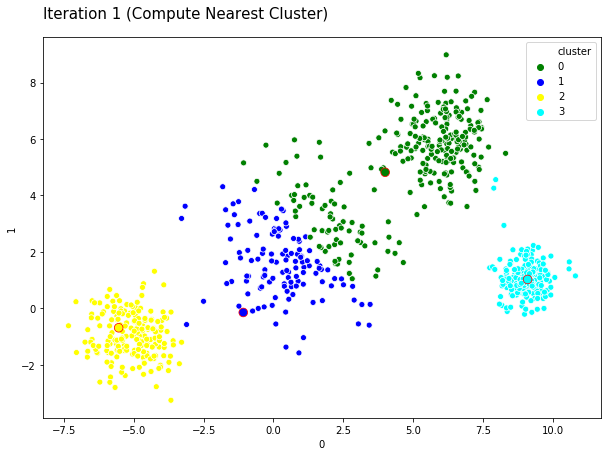

In [12]:
data_df['cluster'] = data_df[[0, 1]].apply(lambda x: find_cluster(x, new_cluster_cntr), axis = 1)
recompute_and_plot(new_cluster_cntr, recompute = False)
plt.annotate('Iteration 1 (Compute Nearest Cluster)', xy = (0, 1.05), xycoords = 'axes fraction', fontsize = 15)

cluster
0    0.574942
1    0.363101
2    0.728501
3    0.099357
dtype: float64

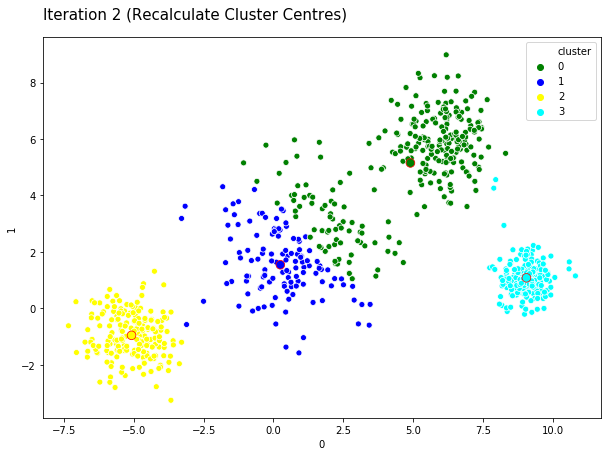

In [13]:
recompute_and_plot(new_cluster_cntr, recompute = True)
plt.annotate('Iteration 2 (Recalculate Cluster Centres)', xy = (0, 1.05), xycoords = 'axes fraction', fontsize = 15)
old_cluster_cntr = new_cluster_cntr
new_cluster_cntr = recompute_centroid(data_df)
(old_cluster_cntr - new_cluster_cntr).apply(lambda x: euclidean_distance(x[0], x[1]), axis = 1)

Text(0, 1.05, 'Iteration 2 (Compute Nearest Cluster)')

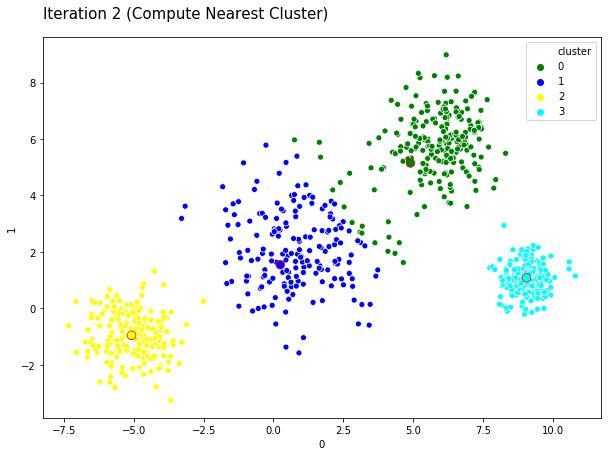

In [14]:
data_df['cluster'] = data_df[[0, 1]].apply(lambda x: find_cluster(x, new_cluster_cntr), axis = 1)
recompute_and_plot(new_cluster_cntr, recompute = False)
plt.annotate('Iteration 2 (Compute Nearest Cluster)', xy = (0, 1.05), xycoords = 'axes fraction', fontsize = 15)

cluster
0    0.295795
1    0.036408
2    0.014635
3    0.044402
dtype: float64

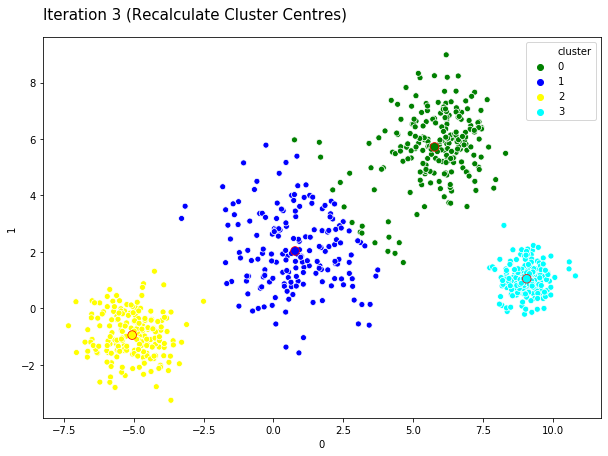

In [15]:
recompute_and_plot(new_cluster_cntr, recompute = True)
plt.annotate('Iteration 3 (Recalculate Cluster Centres)', xy = (0, 1.05), xycoords = 'axes fraction', fontsize = 15)
old_cluster_cntr = new_cluster_cntr
new_cluster_cntr = recompute_centroid(data_df)
(old_cluster_cntr - new_cluster_cntr).apply(lambda x: euclidean_distance(x[0], x[1]), axis = 1)

Text(0, 1.05, 'Iteration 3 (Compute Nearest Cluster)')

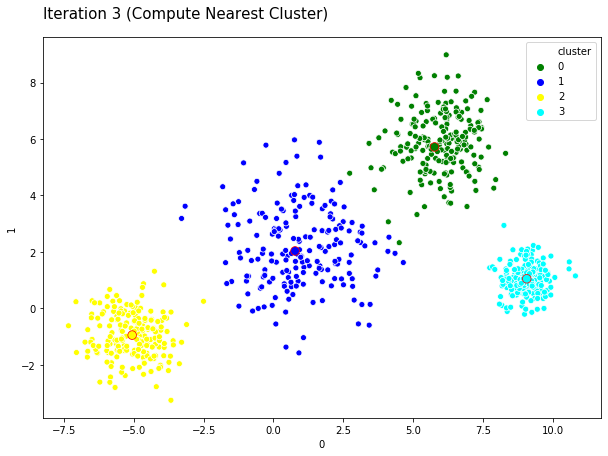

In [16]:
data_df['cluster'] = data_df[[0, 1]].apply(lambda x: find_cluster(x, new_cluster_cntr), axis = 1)
recompute_and_plot(new_cluster_cntr, recompute = False)
plt.annotate('Iteration 3 (Compute Nearest Cluster)', xy = (0, 1.05), xycoords = 'axes fraction', fontsize = 15)

cluster
0    0.037774
1    0.061565
2    0.000000
3    0.000000
dtype: float64

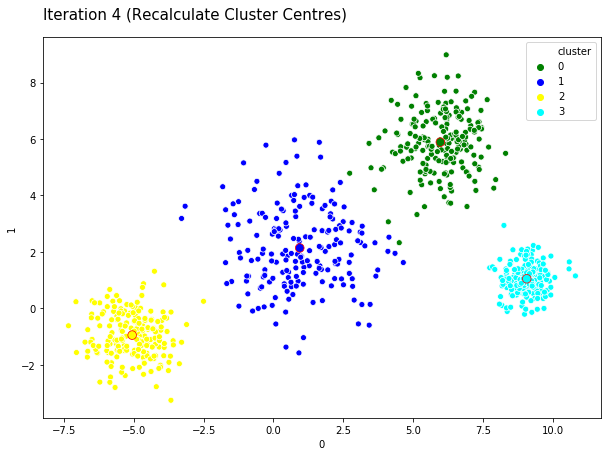

In [17]:
recompute_and_plot(new_cluster_cntr, recompute = True)
plt.annotate('Iteration 4 (Recalculate Cluster Centres)', xy = (0, 1.05), xycoords = 'axes fraction', fontsize = 15)
old_cluster_cntr = new_cluster_cntr
new_cluster_cntr = recompute_centroid(data_df)
(old_cluster_cntr - new_cluster_cntr).apply(lambda x: euclidean_distance(x[0], x[1]), axis = 1)

Text(0, 1.05, 'Iteration 4 (Compute Nearest Cluster)')

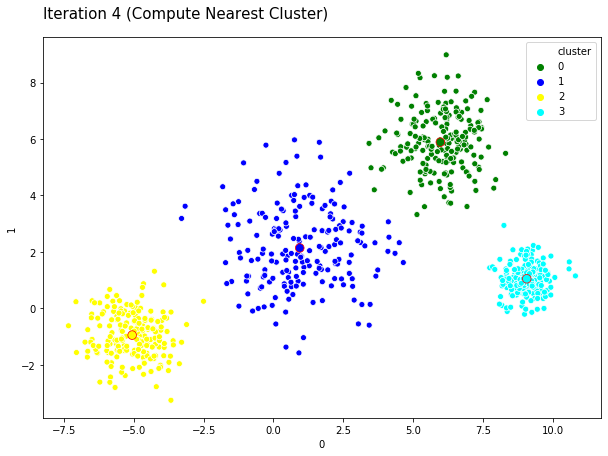

In [18]:
data_df['cluster'] = data_df[[0, 1]].apply(lambda x: find_cluster(x, new_cluster_cntr), axis = 1)
recompute_and_plot(new_cluster_cntr, recompute = False)
plt.annotate('Iteration 4 (Compute Nearest Cluster)', xy = (0, 1.05), xycoords = 'axes fraction', fontsize = 15)

cluster
0    0.004548
1    0.024165
2    0.000000
3    0.000000
dtype: float64

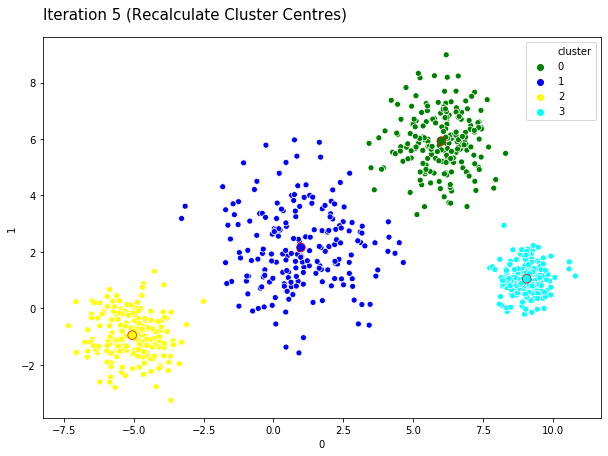

In [19]:
recompute_and_plot(new_cluster_cntr, recompute = True)
plt.annotate('Iteration 5 (Recalculate Cluster Centres)', xy = (0, 1.05), xycoords = 'axes fraction', fontsize = 15)
old_cluster_cntr = new_cluster_cntr
new_cluster_cntr = recompute_centroid(data_df)
(old_cluster_cntr - new_cluster_cntr).apply(lambda x: euclidean_distance(x[0], x[1]), axis = 1)

Text(0, 1.05, 'Iteration 5 (Compute Nearest Cluster)')

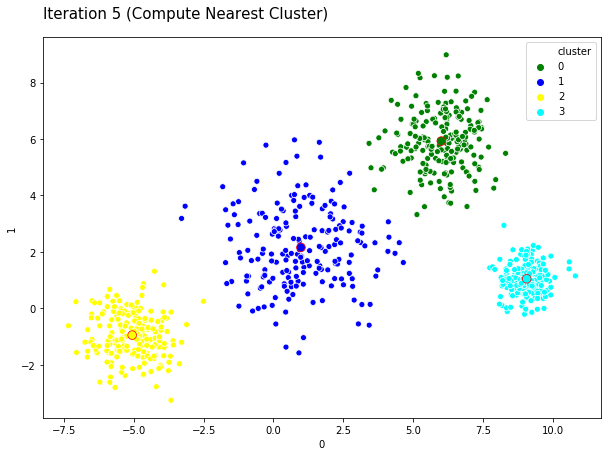

In [20]:
data_df['cluster'] = data_df[[0, 1]].apply(lambda x: find_cluster(x, new_cluster_cntr), axis = 1)
recompute_and_plot(new_cluster_cntr, recompute = False)
plt.annotate('Iteration 5 (Compute Nearest Cluster)', xy = (0, 1.05), xycoords = 'axes fraction', fontsize = 15)

cluster
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64

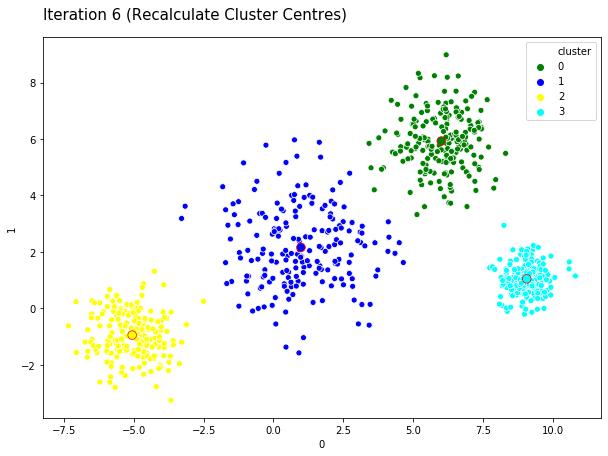

In [21]:
recompute_and_plot(new_cluster_cntr, recompute = True)
plt.annotate('Iteration 6 (Recalculate Cluster Centres)', xy = (0, 1.05), xycoords = 'axes fraction', fontsize = 15)
old_cluster_cntr = new_cluster_cntr
new_cluster_cntr = recompute_centroid(data_df)
(old_cluster_cntr - new_cluster_cntr).apply(lambda x: euclidean_distance(x[0], x[1]), axis = 1)

In [22]:
new_cluster_cntr.reset_index()

,cluster,0,1
0,0,6.005330,5.925289
1,1,0.982978,2.157880
2,2,-5.057170,-0.949670
3,3,9.063639,1.046339


Based on the dataset provided, the K-means algorithm found the final cluster centres in 5 iterations. It didn't proceed with iteration 6 since the cluster centres did not change. The final cluster centres are:
1. (6.005330, 5.925289)
2. (0.982978, 2.157880)
3. (-5.057170, -0.949670)
4. (9.063639, 1.046339)